In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('C:/Users/user/Downloads/ts data.xlsx')
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [7]:
df.shape

(252, 7)

In [9]:
df.info

<bound method DataFrame.info of      Year  Month  Day  Specific Humidity  Relative Humidity  Temperature  \
0    2000      1    1               8.06              48.25        23.93   
1    2000      2    1               8.73              50.81        25.83   
2    2000      3    1               8.48              42.88        26.68   
3    2000      4    1              13.79              55.69        22.49   
4    2000      5    1              17.40              70.88        19.07   
..    ...    ...  ...                ...                ...          ...   
247  2020      8    1              20.08              92.31         5.34   
248  2020      9    1              19.71              90.12         9.22   
249  2020     10    1              18.43              82.69        12.62   
250  2020     11    1              14.83              76.06        16.95   
251  2020     12    1              12.21              69.38        17.77   

     Precipitation  
0             0.00  
1            

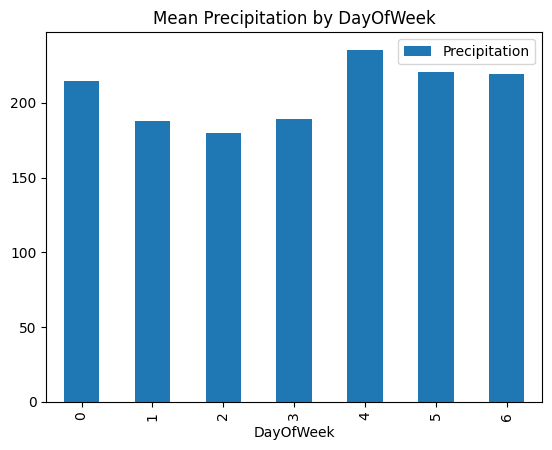

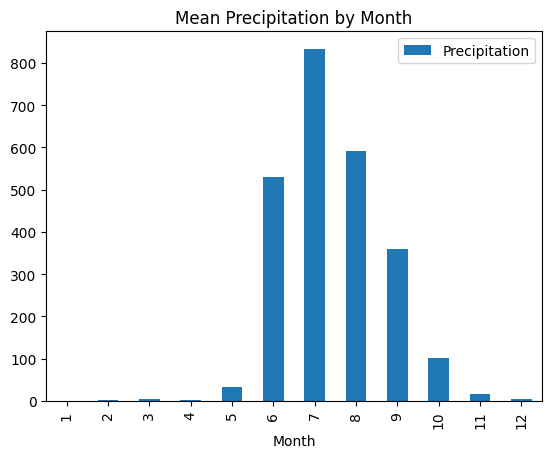

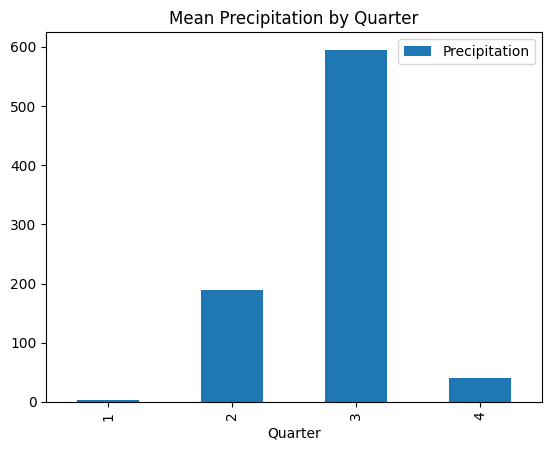

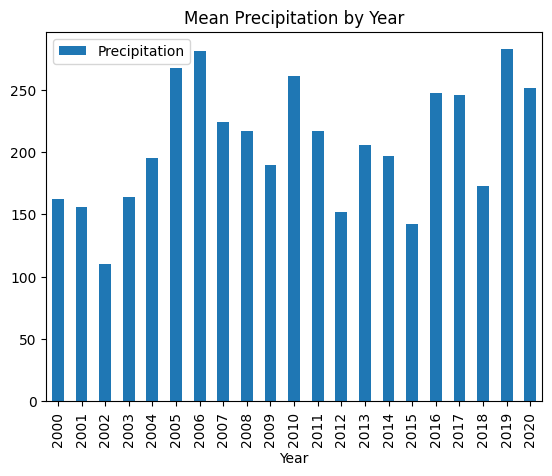

In [10]:
# Feature engineering
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str),
                            format='%Y-%m-%d')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

# EDA
cat_cols = ['DayOfWeek', 'Month', 'Quarter', 'Year']

for col in cat_cols:
    df[['Precipitation', col]].groupby(col).mean().plot.bar()
    plt.title(f'Mean Precipitation by {col}')
    plt.show()

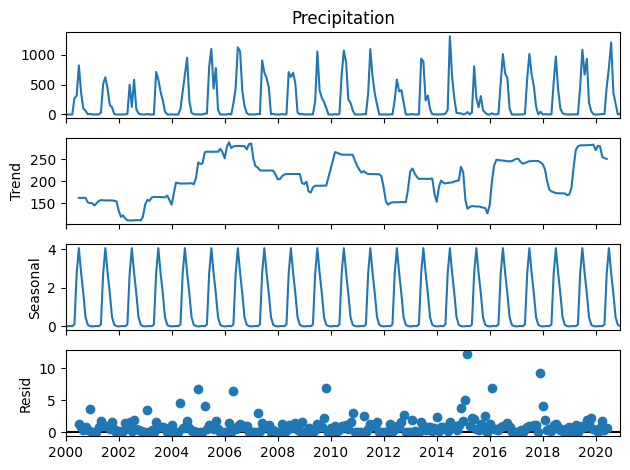

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
ts = df.set_index('Date')['Precipitation'] + 0.01  # Add a small constant
result = seasonal_decompose(ts, model='multiplicative', period=12)
result.plot()
plt.show()

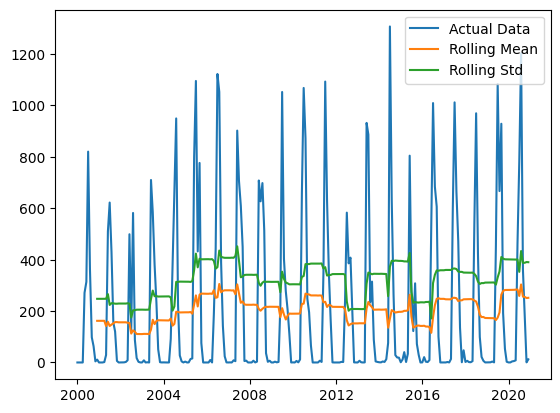

In [16]:
# Rolling and Aggregations
rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(ts, label='Actual Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()